<a href="https://colab.research.google.com/github/neocodered/EN3150_Pattern_Recognition/blob/main/PR_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data pre-processing
### 1. max-abs is the best scaling method in this scenario. In analyzing feature 1 we can see that feature 1 contains many sparse data points. With max-abs sparce data points wouldn't change so the structure won't change in the data distribution. In feature 2 overshoots are not seen. Therefore it is ok to use max-abs. Since no overshoots it won't effect scaling with the max-abs.

# 2. Learning from data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate 100 samples
n_samples = 100

# Generate X values (uniformly distributed between 0 and 10)
X = 10 * np.random.rand(n_samples, 1)

# Generate epsilon values (normally distributed with mean 0 and standard deviation 15)
epsilon = np.random.normal(0, 15, n_samples)

# Generate Y values using the model Y = 3 + 2X + epsilon, epsilon gives us the noise
Y = 3 + 2 * X + epsilon[:, np.newaxis]

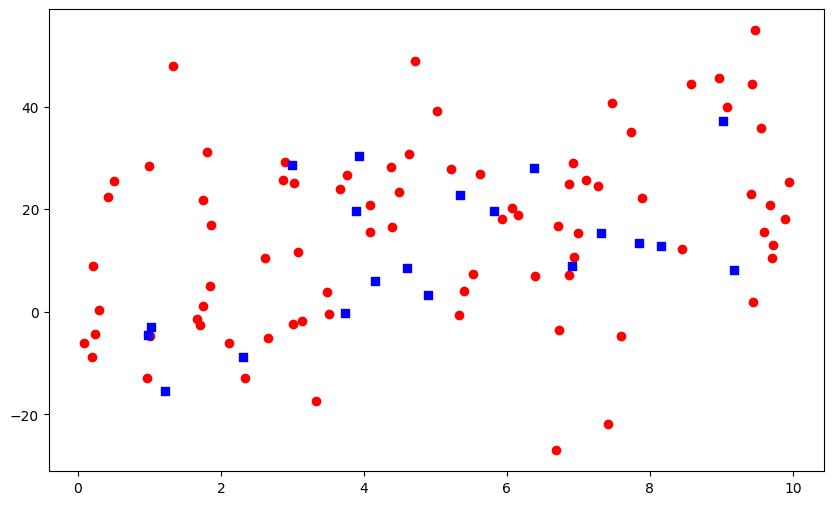

In [2]:
r=np.random.randint(104)
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=r)
# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, alpha=1, marker='o',color='red',label='Training Data')
plt.scatter(X_test, Y_test, alpha=1, marker='s',color='blue',label='Testing Data')
plt.show()

### 2. Training and testing data sets are different in each run. This is becuase in random_state when the integer is set to a certain value the shuffling of data will be consistent in each run. This is for data reproducability. But when we change the random_state parameter in a random manner we can get different shuffling in different runs.

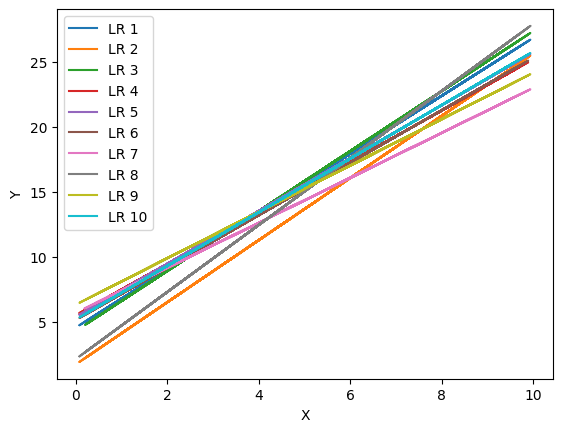

In [3]:
for i in range(10): # Plotting 10 different instances
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=np.random.randint(104))
  model = LinearRegression()
  model.fit(X_train, Y_train)
  Y_pred_train = model.predict(X_train)
  plt.plot(X_train, Y_pred_train, label=f'LR {i+1}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### 3. At each iteration a the model is fitted to a different data set. Since the model created will vary with the data set the linear regression model is different from one instance to other.

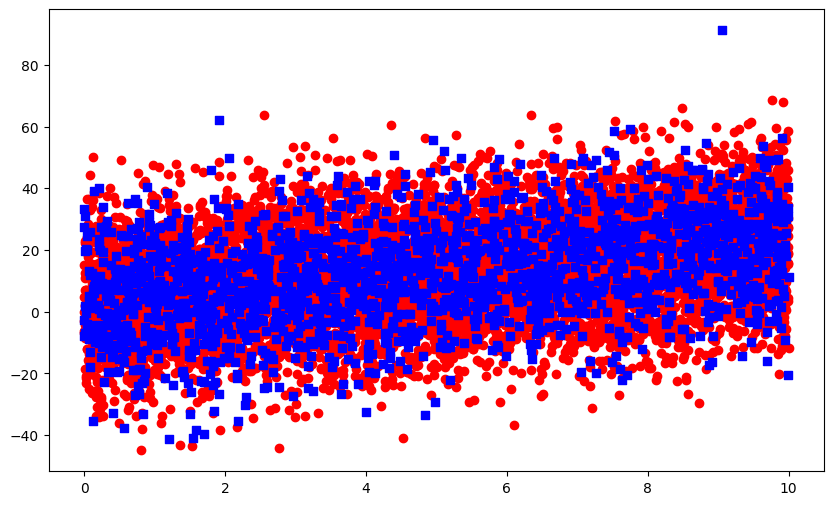

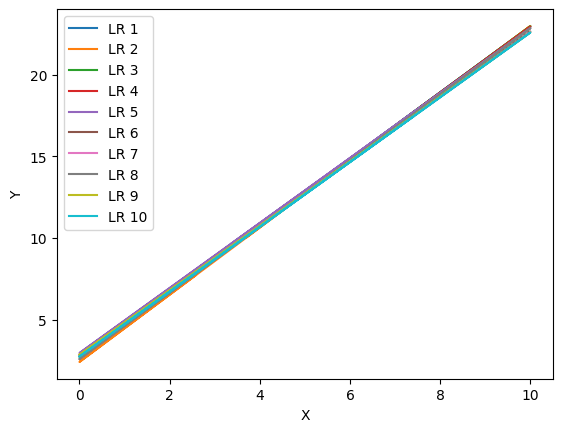

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate 100 samples
n_samples = 10000

# Generate X values (uniformly distributed between 0 and 10)
X = 10 * np.random.rand(n_samples, 1)

# Generate epsilon values (normally distributed with mean 0 and standard deviation 15)
epsilon = np.random.normal(0, 15, n_samples)

# Generate Y values using the model Y = 3 + 2X + epsilon, epsilon gives us the noise
Y = 3 + 2 * X + epsilon[:, np.newaxis]

r=np.random.randint(104)
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=r)
# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, alpha=1, marker='o',color='red',label='Training Data')
plt.scatter(X_test, Y_test, alpha=1, marker='s',color='blue',label='Testing Data')
plt.show()

for i in range(10): # Plotting 10 different instances
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=np.random.randint(104))
  model = LinearRegression()
  model.fit(X_train, Y_train)
  Y_pred_train = model.predict(X_train)
  plt.plot(X_train, Y_pred_train, label=f'LR {i+1}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### 4. The models created are focused on many data points than in the 100 data point instance. Since every model trained in each iteration is trained for 8000 data points the variation of the weights of the models are very less compared to the 100 data point model. Therefore the 10 models that are trained falls nearly close on to each other.

# 3. Linear regression on real world data

In [5]:
!pip install ucimlrepo

In [10]:
# If package not installed, install it using pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
# fetch dataset
infrared_thermography_temperature = fetch_ucirepo(id=925)
# data (as pandas dataframes)
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets
# metadata
print(infrared_thermography_temperature.metadata)
# variable information
print(infrared_thermography_temperature.variables)

{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

### 2. Number of Independent Variables = 33, Number of Dependent Variables = 2

### 3. No. There are 3 categorical variables namely Gender, Age and Ethnicity. Need to convert these categorical data into numerical data. For Age it is good to use label encoding because the categorical data has an order. For Age and Gender it is advisable to use one-hot encoding because it is not showing any order.

### 4. No. The correct approach is given below.

In [ ]:
# infrared_thermography_temperature.data.dropna(subset=['Age'], inplace='True')
# infrared_thermography_temperature.data.dropna(subset=['Gender'], inplace='True')

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Age' column
infrared_thermography_temperature.data['features']['Age_Encoded'] = label_encoder.fit_transform(infrared_thermography_temperature.data['features']['Age'])

X = infrared_thermography_temperature.data['features'][['Age_Encoded', 'T_OR_Max1', 'T_offset1', 'Max1R13_1', 'Max1L13_1']]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame
X_scaled = pd.DataFrame(scaled_data, columns=X.columns)

# # Display the scaled data
# print("\nScaled Data:")
# print(X_scaled)

# Label (Y) - Selecting the label column
Y = infrared_thermography_temperature.data['targets']['aveOralM']
# print(X)
# print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, Y_train)

# Print the coefficients of the model
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficients: [ 0.06076464  1.9202906  -0.27368859  1.06277283  0.6893235 ]
Model Intercept: 35.65677314270801


<ipython-input-23-6ced4ceb351f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infrared_thermography_temperature.data['features']['Age_Encoded'] = label_encoder.fit_transform(infrared_thermography_temperature.data['features']['Age'])


### 8. T_OR_Max1 has the highest coefficient hence contributes the most to the dependent feature.

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict the label for the test set
Y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared Score
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.06958685241459774
R-squared Score: 0.6695343751078776


In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd

# Initialize LabelEncoder
# label_encoder = LabelEncoder()

# Apply label encoding to the 'Age' column
# infrared_thermography_temperature.data['features']['Age_Encoded'] = label_encoder.fit_transform(infrared_thermography_temperature.data['features']['Age'])

X = infrared_thermography_temperature.data['features'][['T_OR1', 'T_OR_Max1', 'T_FHC_Max1', 'T_FH_Max1']]
# print(X)
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame
X_scaled = pd.DataFrame(scaled_data, columns=X.columns)

# # # Display the scaled data
# # print("\nScaled Data:")
# # print(X_scaled)

# # Label (Y) - Selecting the label column
Y = infrared_thermography_temperature.data['targets']['aveOralM']
# # print(X)
# # print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
trained_model = model.fit(X_train, Y_train)

# Print the coefficients of the model
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficients: [ 0.42456597  2.14400246 -0.4534699   1.70422323]
Model Intercept: 35.40575690682322


## Calculation of RSS, RSE, MSE, R^2, SD Error fo reach Feture, T-stat for each feature, P-value for each feature

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict the label for the test set
Y_pred = model.predict(X_test)

# Calculate RSS
rss = np.sum((Y_test - Y_pred) ** 2)
print(f"Residual Sum of Squares (RSS): {rss}")

# Calculate RSE
rse = np.sqrt(rss/(len(X_test)-4-1))
print(f"Root Mean Squared Error (RSE): {rse}")
# print(len(X_test))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared Score
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared Score: {r2}")



Residual Sum of Squares (RSS): 15.170504359408294
Root Mean Squared Error (RSE): 0.2761044915394947
Mean Squared Error: 0.07436521744807988
R-squared Score: 0.6468420800555856


In [38]:
import statsmodels.api as sm

# Add a constant to the model (intercept term)
X_train_const = sm.add_constant(X_train)

# Fit the model using statsmodels
sm_model = sm.OLS(Y_train, X_train_const).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:               aveOralM   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     365.7
Date:                Fri, 30 Aug 2024   Prob (F-statistic):          7.43e-180
Time:                        12:04:29   Log-Likelihood:                -205.33
No. Observations:                 816   AIC:                             420.7
Df Residuals:                     811   BIC:                             444.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.4058      0.053    662.724      0.0

### 11. Yes. Since the P value for T_OR1 and T_OR_Max1 higher than 0.05 there is no much significance from those features to the model